In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

In [2]:
X, y = mnist["data"], mnist["target"].astype(int)

In [3]:
import matplotlib
import matplotlib.pyplot as plt

def plot_digit(digit):
    plt.imshow(digit, cmap = matplotlib.cm.binary,
              interpolation = "nearest")
    plt.axis("off")

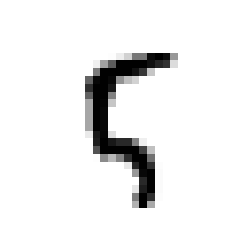

In [4]:
some_digit = X[100]
plot_digit(some_digit.reshape(28,28))
plt.show()

In [5]:
y[100]

5

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train.astype(np.float64))
X_test = ss.transform(X_test.astype(np.float64))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = [
    {'weights': ['uniform', 'distance'],
     'n_neighbors': [4, 5, 6],
    }
]

knn_clf = KNeighborsClassifier()

grid_search = GridSearchCV(knn_clf, param_grid, cv = 3, 
                           scoring = "accuracy")
grid_search.fit(X_train, y_train)

In [ ]:
cross_val_score(grid_search.best_model_, X_train, y_train, 
                cv = 3, scoring = "accuracy")